# Creating a Mie Scattering Table

This notebook demonstrates how to create a Mie scattering table. Source code resides in: src/unpolarized/make_mie_table.f90. 

The source Fortran code was created by Frank Evans and it is part of the SHDOM package: http://nit.colorado.edu/shdom.html

The python wrapper was created by Aviad Levis, Technion inst. of Technology 2019: https://github.com/aviadlevis/pyshdom

In [1]:
"""
Imports necessary for this notebook
"""
import os 
import numpy as np
import matplotlib.pyplot as plt
import shdom

In [2]:
"""
Create a monodisperse Mie scattering table for a set wavelength as a function of radius.
This table can be integrated for Polydisperse Mie scattering as a function of the size-distribution parameters.

Note: 
Running this cell for max_integration_radius=65 takes ~15secs
"""
mie_mono = shdom.MieMonodisperse(particle_type='Water')
mie_mono.set_wavelength_integration(wavelength_band=(0.672, 0.672))   
mie_mono.set_radius_integration(minimum_effective_radius=1.0, max_integration_radius=65)

mie_mono.compute_table()

In [3]:
""" 
Create a directory (if doesnt exist) and write the Mie table, that was created 
in the previous cell, for for later use.
"""
directory = '../mie_tables/monodisperse/'

# safe creation of the directory
if not os.path.exists(directory):
    os.makedirs(directory)
output_path = os.path.join(directory, 'Water_672nm.scat')
    
mie_mono.write_table(output_path)

Writing Mie monodisperse table to file: ../mie_tables/monodisperse/Water_672nm.scat


Text(0.5, 0, 'radius [micron]')

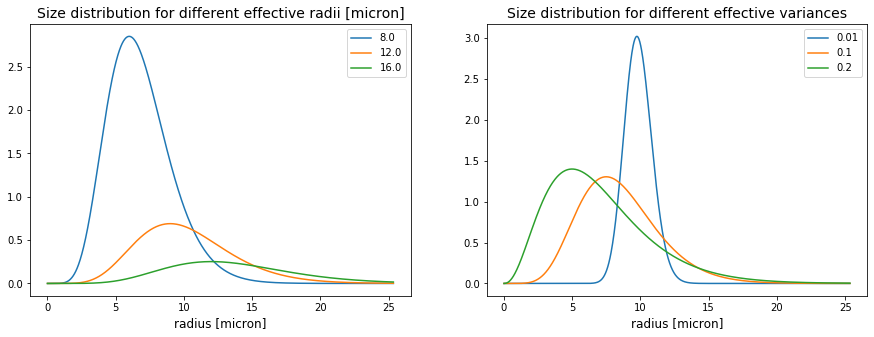

In [4]:
"""
Compute a size distribution and plot for several size distribution parameters
"""
size_distribution = shdom.SizeDistribution(type='gamma')
size_distribution.set_parameters(reff=np.linspace(1.0, 30.0, 100), veff=np.linspace(0.01, 0.8, 100))
size_distribution.compute_nd(radii=mie_mono.radii, particle_density=mie_mono.pardens)

%matplotlib inline
radii = size_distribution.radii[:1000]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

reff = [8.0, 12.0, 16.0]
size_dist = size_distribution.get_nd(reff=reff, veff=0.1)[:1000]
ax1.plot(radii, size_dist)
ax1.legend(reff)
ax1.set_title('Size distribution for different effective radii [micron]', fontsize=14)
ax1.set_xlabel('radius [micron]', fontsize=12)

veff = [0.01, 0.1, 0.2]
size_dist = size_distribution.get_nd(reff=10.0, veff=veff)[:1000]
ax2.plot(radii, size_dist)
ax2.legend(veff)
ax2.set_title('Size distribution for different effective variances', fontsize=14)
ax2.set_xlabel('radius [micron]', fontsize=12)

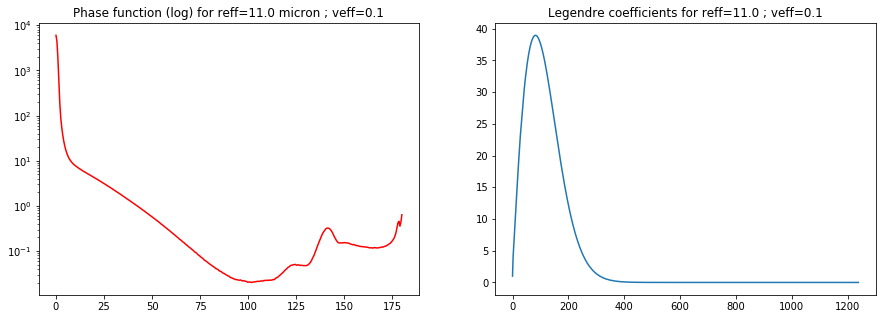

In [5]:
"""
Compute Polydisperse scattering for multiple size-distributions and save a polydisperse table
"""
mie_poly = shdom.MiePolydisperse(
    mono_disperse=mie_mono, 
    size_distribution=size_distribution
)
mie_poly.compute_table()

plot_re = 11.0
plot_ve = 0.1
angles = np.linspace(0,180, 360)

%matplotlib inline
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5));
ax1.semilogy(angles, mie_poly.get_angular_scattering(plot_re, plot_ve, angles), 'r')
ax1.set_title('Phase function (log) for reff={:2.1f} micron ; veff={:1.2}'.format(plot_re, plot_ve),);
ax2.plot(mie_poly.get_legendre(plot_re, plot_ve))
ax2.set_title('Legendre coefficients for reff={:2.1f} ; veff={:1.2}'.format(plot_re, plot_ve));

In [6]:
""" 
Create a directory (if doesnt exist) and write the Mie table, that was created 
in the previous cell, for for later use.
"""
directory = '../mie_tables/polydisperse/' 

# safe creation of the directory
if not os.path.exists(directory):
    os.makedirs(directory)
output_path = os.path.join(directory, 'Water_672nm.scat')
    
mie_poly.write_table(output_path)

Writing mie table to file: ../mie_tables/polydisperse/Water_672nm.scat
